# Unsupervised Topic Modeling Classes in scikit-learn

### 1 sklearn.decomposition.LatentDirichletAllocation
Implements Latent Dirichlet Allocation (LDA), a generative probabilistic model that allows sets of observations to be explained by unobserved groups, explaining why some parts of the data are similar.

### 2 sklearn.decomposition.NMF
Non-Negative Matrix Factorization (NMF) is used for parts-based representation of data, which can be effective for topic modeling by decomposing the document-term matrix into topic and word matrices.

### 3 sklearn.decomposition.TruncatedSVD
Performs dimensionality reduction using truncated Singular Value Decomposition (SVD). It's particularly useful for Latent Semantic Analysis (LSA), which is a technique in NLP for analyzing relationships between a set of documents and the terms they contain.

# =====================LDA========================
## What Is LDA?

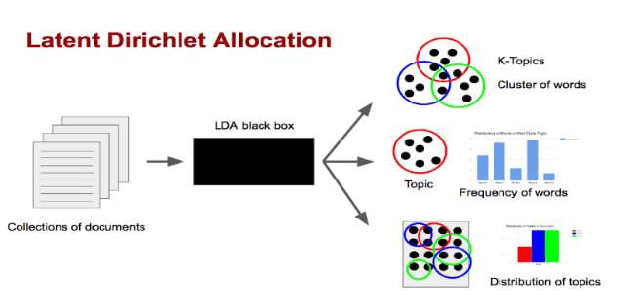

LDA is like trying to guess the topics of a bunch of books just by looking at the words inside them — without reading the titles.

Imagine you're handed 1,000 newspaper articles, and no one tells you what they're about. You start to notice that:

Some articles keep mentioning “government,” “election,” “president” — must be about politics.

Others mention “stocks,” “market,” “investors” — likely about finance.

Some talk about “goals,” “teams,” “match” — clearly about sports.

 LDA is an algorithm that does this automatically — it finds hidden "topics" inside a large set of texts, based on the words used.
 
 
### Why Use LDA?

To understand what people are talking about in a large collection of texts.

To group similar documents together.

To summarize data like tweets, reviews, emails, or reports without reading them all.




### Problem Definition
In large corpora such as customer reviews, news articles, or financial disclosures, identifying common themes manually is infeasible. We aim to automatically extract latent topics from a collection of documents using Latent Dirichlet Allocation (LDA) in scikit-learn.
This helps in summarizing large texts, understanding customer concerns, or detecting disclosure themes in financial texts.



### Dataset 
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv    

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 1. Sample sentences
documents = [
    "The government passed a new health policy.",
    "Doctors recommend a healthy diet and exercise.",
    "The president gave a speech about the economy.",
    "Investors are concerned about rising inflation.",
    "Hospitals are updating medical equipment.",
    "Stocks soared after the market opened strong."
]

In [21]:
# 2. Convert text to term-document matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0]])

In [22]:
# 3. Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=0)  # 2 topics
lda.fit(X)

LatentDirichletAllocation(n_components=2, random_state=0)

In [23]:
lda.components_

array([[0.50519445, 1.49549956, 1.49549956, 0.50519331, 1.49433825,
        1.49549956, 0.50519331, 1.49550169, 1.49550169, 1.49549956,
        1.49433825, 0.50519445, 0.50519445, 0.50413216, 1.49433825,
        1.49550169, 0.50413216, 1.49550169, 1.49550169, 0.50519331,
        1.49549956, 0.50519445, 0.50413216, 0.50519331, 0.50413216,
        0.50413216, 1.49433825],
       [1.49480555, 0.50450044, 0.50450044, 1.49480669, 0.50566175,
        0.50450044, 1.49480669, 0.50449831, 0.50449831, 0.50450044,
        0.50566175, 1.49480555, 1.49480555, 1.49586784, 0.50566175,
        0.50449831, 1.49586784, 0.50449831, 0.50449831, 1.49480669,
        0.50450044, 1.49480555, 1.49586784, 1.49480669, 1.49586784,
        1.49586784, 0.50566175]])

In [24]:
# 4. Show top words for each topic
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words = [words[i] for i in topic.argsort()[-5:]]  # Top 5 words
    print(", ".join(top_words))


Topic #1:
policy, new, health, government, passed

Topic #2:
opened, market, soared, stocks, strong
